# Step Counting Algorithm


In [2]:
import random
from collections import defaultdict
import math
from heapq import heappop, heappush
from math import inf, sqrt
from visualization import visualize_graph

class graph_vertex:
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

In [3]:
# Built graph

# Set up example graph
a = graph_vertex("A", 0, 2)
b = graph_vertex("B", 1, 4)
c = graph_vertex("C", 1, 1)
d = graph_vertex("D", 2, 2)
e = graph_vertex("E", 4, 1)
f = graph_vertex("F", 5, 3)
g = graph_vertex("G", 6, 1)

euclidean_graph = {
  a: [(b, 2.2), (c, 1.4)],
  b: [(a, 2.2), (d, 2.2)],
  c: [(a, 1.4), (d, 1.4)],
  d: [(b, 2.2), (c, 1.4), (e, 2.2), (f, 3.1)],
  e: [(d, 2.2), (g, 2), (f, 2.2)],
  f: [(d, 3.1), (g, 2.2), (e, 2.2)],
  g: [(e, 2), (f, 2.2)]
  }

In [10]:
# Create a random graph!
def generate_random_graph_nodes(n):
    """
    Generate n random graph nodes with random coordinates.

    Parameters:
    - n (int): The number of nodes to generate.

    Returns:
    - list: A list of GraphVertex objects representing the generated nodes.
    """
    nodes = []
    for i in range(n):
        name = chr(65 + i)  # Generate node names A, B, C, ...
        x = random.randint(0, 30)  # Generates a random whole number between 0 and 30 (inclusive)
        y = random.randint(0, 30)  # Generates a random whole number between 0 and 30 (inclusive)
        nodes.append(graph_vertex(name, x, y))
    return nodes


def calculate_distance(v1, v2):
    """
    Calculate the Euclidean distance between two graph vertices.

    Parameters:
    - v1, v2 (GraphVertex): The two graph vertices.

    Returns:
    - float: The Euclidean distance between v1 and v2.
    """
    x1, y1 = v1.position
    x2, y2 = v2.position
    distance = math.ceil(((x1 - x2)**2 + (y1 - y2)**2)**0.5)
    return distance


def generate_random_connected_graph(nodes):
    """
    Generate a random connected graph with a random number of edges for each node.

    Parameters:
    - nodes (list): A list of GraphVertex objects representing nodes.

    Returns:
    - dict: A dictionary representation of the graph with distances.
    """
    graph = defaultdict(list)

    for i, node in enumerate(nodes):
        # Randomly determine the number of edges for each node
        num_edges = random.randint(1, len(nodes) // 2)

        # Randomly connect the node to other nodes
        for _ in range(num_edges):
            j = random.randint(0, len(nodes) - 1)
            other_node = nodes[j]

            # Avoid connecting a node to itself
            if other_node != node:
                distance = calculate_distance(node, other_node)
                graph[node].append((other_node, distance))
                graph[other_node].append((node, distance))

    return dict(graph)

# Example: Generate 7 random nodes from 'A' to 'G'
random_nodes = generate_random_graph_nodes(10)

# Generate a random connected graph with distances
euclidean_graph = generate_random_connected_graph(random_nodes)

# Print the generated graph
for vertex, neighbors in euclidean_graph.items():
    print(f"{vertex.name}: {[(neighbor.name, distance) for neighbor, distance in neighbors]}")

A: [('B', 15), ('H', 19), ('B', 15), ('F', 24), ('G', 12)]
B: [('A', 15), ('A', 15), ('E', 12), ('F', 12), ('G', 11)]
H: [('A', 19), ('D', 13), ('D', 13), ('E', 17), ('G', 16), ('E', 17), ('I', 19), ('I', 19), ('J', 14), ('J', 14)]
F: [('A', 24), ('E', 23), ('B', 12), ('D', 16)]
E: [('B', 12), ('D', 17), ('J', 8), ('J', 8), ('F', 23), ('H', 17), ('H', 17), ('J', 8)]
C: [('D', 16), ('G', 12)]
D: [('C', 16), ('H', 13), ('E', 17), ('G', 18), ('G', 18), ('F', 16), ('H', 13), ('I', 6), ('I', 6)]
G: [('C', 12), ('D', 18), ('D', 18), ('B', 11), ('I', 22), ('A', 12), ('H', 16)]
J: [('E', 8), ('E', 8), ('E', 8), ('H', 14), ('H', 14)]
I: [('G', 22), ('D', 6), ('H', 19), ('D', 6), ('H', 19)]


In [18]:
print(random_nodes)
for vertex in random_nodes:
    print(f"{vertex.name} and {vertex.position}")

[<__main__.graph_vertex object at 0x7fb51f4774d0>, <__main__.graph_vertex object at 0x7fb51e7f4510>, <__main__.graph_vertex object at 0x7fb51f474e50>, <__main__.graph_vertex object at 0x7fb51f476cd0>, <__main__.graph_vertex object at 0x7fb51eaf8750>, <__main__.graph_vertex object at 0x7fb51eaf87d0>, <__main__.graph_vertex object at 0x7fb51eaf8810>, <__main__.graph_vertex object at 0x7fb51eaf8850>, <__main__.graph_vertex object at 0x7fb51eaf8890>, <__main__.graph_vertex object at 0x7fb51eaf85d0>]
A and (20, 16)
B and (14, 3)
C and (24, 17)
D and (9, 14)
E and (24, 8)
F and (3, 0)
G and (24, 5)
H and (9, 1)
I and (8, 19)
J and (23, 1)


In [14]:
def heuristic(start, target):
  """
    Heuristic function for A* algorithm, calculates the Euclidean distance between two vertices.

    Parameters:
        start (graph_vertex): The starting vertex.
        target (graph_vertex): The target vertex.

    Returns:
        float: The Euclidean distance between the start and target vertices.
  """
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return sqrt(x_distance * x_distance + y_distance * y_distance)

def stepCounting(graph, start, target_node, target_steps):
    
    #store: steps_taken, path_taken
    #at each node: generate a list of all possible options with their scores where score = steps taken + steps to next node + heuristic at next node

    steps_taken = 0
    path_taken = [start]
    current_node = start
    previous_node = start

    while current_node != target_node:
      next_nodes = graph[current_node]
      best_node = None
      best_node_score = inf

      for node in next_nodes:
        if node[0] != previous_node: #assume this is for a graph where there are no nodes with only one node adjacent - degree >= 2 for all
          node_heuristic = heuristic(node[0], target_node)
          score = steps_taken + node[1] + node_heuristic
          if abs(score - target_steps) < abs(best_node_score - target_steps):
              best_node = node
              best_node_score = score
      
      steps_taken += best_node[1]
      previous_node = current_node
      current_node = best_node[0]
      path_taken.append(current_node)

    return path_taken, steps_taken


path, steps = stepCounting(euclidean_graph, random_nodes[0], random_nodes[-1], 100)
print()
for step in path:
  print(step.name)
print(steps)

This is node B 9.219544457292887
This is node H 14.0
This is node B 9.219544457292887
This is node F 20.024984394500787
This is node G 4.123105625617661
This is node E 7.0710678118654755
This is node B 9.219544457292887
This is node D 19.1049731745428
This is node C 16.0312195418814
This is node H 14.0
This is node E 7.0710678118654755
This is node G 4.123105625617661
This is node G 4.123105625617661
This is node H 14.0
This is node I 23.430749027719962
This is node I 23.430749027719962
This is node G 4.123105625617661
This is node D 19.1049731745428
This is node D 19.1049731745428
This is node B 9.219544457292887
This is node I 23.430749027719962
This is node A 15.297058540778355
This is node H 14.0
This is node A 15.297058540778355
This is node D 19.1049731745428
This is node D 19.1049731745428
This is node E 7.0710678118654755
This is node E 7.0710678118654755
This is node I 23.430749027719962
This is node I 23.430749027719962
This is node J 0.0
This is node J 0.0

A
F
D
C
G
H
J
98


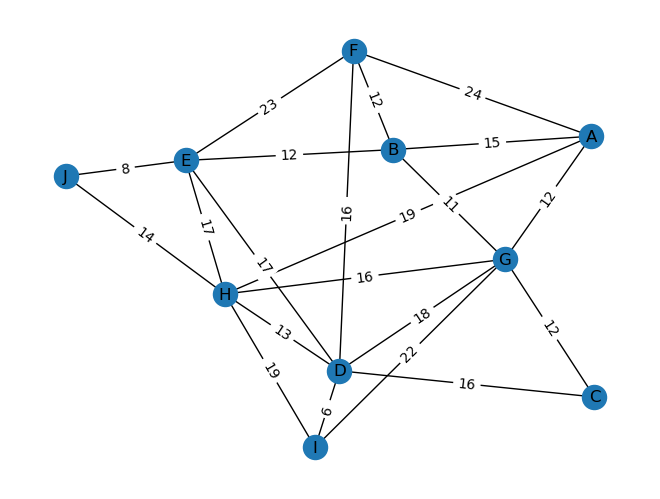

In [11]:
def create_edge_dict(graph):
  """
    Converts a graph into a dictionary for edge visualization.

    Parameters:
        graph (dict): A dictionary representing the graph.

    Returns:
        dict: A dictionary where keys are tuples (start_vertex_name, end_vertex_name) and values are edge weights.
  """
  edge_dict = {}
  for key, connections in graph.items():
    for conn in connections:
        edge_dict[(key.name, conn[0].name)] = conn[1]
            
  return edge_dict

# Visualization of the graph
graph_edge_dict = create_edge_dict(euclidean_graph)
print()
visualize_graph(graph_edge_dict, [])